# W6 Lab Assignment

Deep dive into Histogram and boxplot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_style('white')

%matplotlib inline 

# Histogram


Let's revisit the table from the class

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's do that for convenience. 

In [2]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100} 

Draw histogram using this data. Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

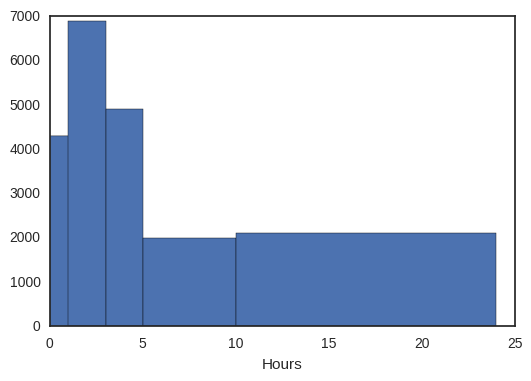

In [3]:
# TODO: draw a histogram with pre-counted data. 
#plt.xlabel("Hours")
val, weight = zip(*[(k, v) for k,v in data.items()])
plt.hist(val, weights=weight, bins = bins)
plt.xlabel("Hours")

As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width. One simple way to fix this is using the option [`normed`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). 

(array([ 0.21287129,  0.17079208,  0.12128713,  0.01980198,  0.00742574]),
 array([ 0,  1,  3,  5, 10, 24]),
 <a list of 5 Patch objects>)

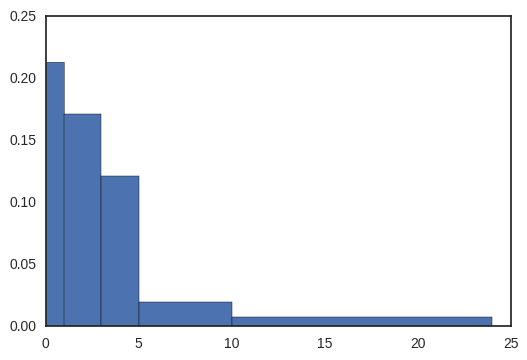

In [4]:
# TODO: fix it with normed option. 
plt.hist(val, weights=weight, bins = bins, normed = True)

## IMDB data

How does matplotlib decide the bin width? Let's try with the IMDb data.

In [5]:
# TODO: Load IMDB data into movie_df using pandas
movie_df = pd.read_csv('imdb.csv', delimiter='\t')
movie_df.head()

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61
2,#7DaysLater,2013,7.1,14
3,#Bikerlive,2014,6.8,11
4,#ByMySide,2012,5.5,13


Plot the histogram of movie ratings using the `plt.hist()` function.

(array([   824.,   3363.,   9505.,  21207.,  42500.,  69391.,  86470.,
         58059.,  21538.,    154.]),
 array([ 1.  ,  1.89,  2.78,  3.67,  4.56,  5.45,  6.34,  7.23,  8.12,
         9.01,  9.9 ]),
 <a list of 10 Patch objects>)

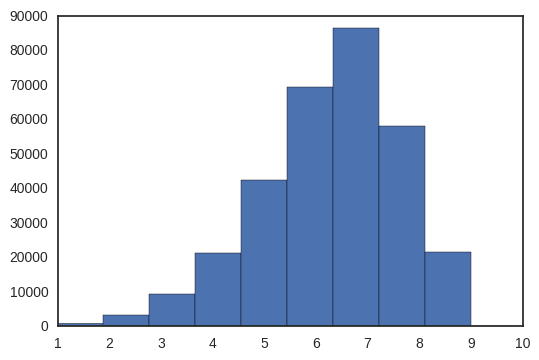

In [6]:
plt.hist(movie_df['Rating'])

Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

[   824.   3363.   9505.  21207.  42500.  69391.  86470.  58059.  21538.
    154.]
[ 1.    1.89  2.78  3.67  4.56  5.45  6.34  7.23  8.12  9.01  9.9 ]


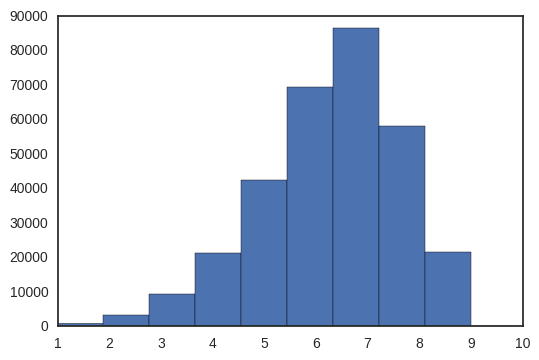

In [7]:
n_raw, bins_raw, patches = plt.hist(movie_df['Rating'])
print(n_raw)
print(bins_raw)

Actually, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies:

In [8]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies. 
sum(n_raw)==len(movie_df)

True

The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.0,1.89\], the second \[1.89,2.78\], and so on. We can calculate the width of each bin.

In [9]:
# TODO: calculate the width of each bin and print them. 
for i in range(len(bins_raw)-1):
    print (bins_raw[i+1] - bins_raw[i])

0.89
0.89
0.89
0.89
0.89
0.89
0.89
0.89
0.89
0.89


The above `for` loop can be conveniently rewritten as the following, using [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) and the [**`zip()`**](https://docs.python.org/3/library/functions.html#zip) function. Can you explain what's going on inside the zip?

In [10]:
[ j-i for i,j in zip(bins_raw[:-1],bins_raw[1:]) ]

[0.89000000000000012,
 0.89000000000000012,
 0.88999999999999968,
 0.89000000000000057,
 0.88999999999999968,
 0.88999999999999968,
 0.89000000000000057,
 0.89000000000000057,
 0.88999999999999879,
 0.89000000000000057]

Noticed that the width of each bin is the same? This is equal-width binning. We can calculate the width as:

In [11]:
min_rating = min(movie_df['Rating'])
max_rating = max(movie_df['Rating'])
print(min_rating, max_rating)
print( (max_rating-min_rating) / 10 )

1.0 9.9
0.89


Now, let's plot the histogram where the y axis is normed.

[ 0.00295786  0.01207195  0.03411949  0.07612541  0.15255952  0.24908842
  0.31039581  0.20841067  0.07731358  0.0005528 ]
[ 1.    1.89  2.78  3.67  4.56  5.45  6.34  7.23  8.12  9.01  9.9 ]


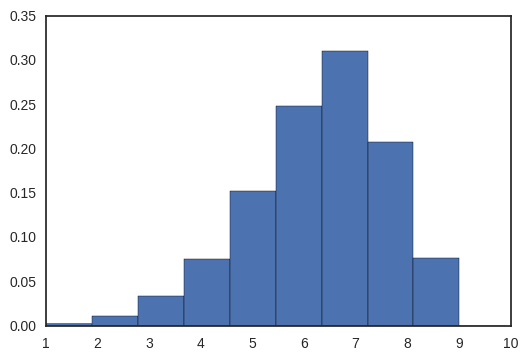

In [12]:
n, bins, patches = plt.hist(movie_df['Rating'], normed=True)
print(n)
print(bins)

In this case, the edges of the 10 bins do not change. But now `n` represents the heights of the bins. Can you verify that matplotlib has correctly normed the heights of the bins?

Hint: the area of each bin should be equal to the fraction of movies in that bin.

In [13]:
# TODO: verify that it is properly normalized. 
normalizeList = []
for i in range(len(bins)):
    try:
        Moviesbins = movie_df[(movie_df['Rating'] >= bins[i]) & (movie_df['Rating'] <= bins[i+1])]
        normalizeList.append(round(len(Moviesbins)/len(movie_df), 4))
    except IndexError:
        pass
print("Bin widths", normalizeList)
print("Data from histogram", n)

Bin widths [0.0026, 0.0107, 0.0304, 0.0678, 0.1358, 0.2217, 0.2763, 0.1855, 0.0688, 0.0005]
Data from histogram [ 0.00295786  0.01207195  0.03411949  0.07612541  0.15255952  0.24908842
  0.31039581  0.20841067  0.07731358  0.0005528 ]


## Selecting binsize

A nice to way to explore this is using the "[small multiples](https://www.google.com/search?client=safari&rls=en&q=small+multiples&ie=UTF-8&oe=UTF-8)" with a set of sample bin sizes. In other words, pick some binsizes that you want to see and draw many plots within a single "figure". Read about [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8). For instance, you can do something like:

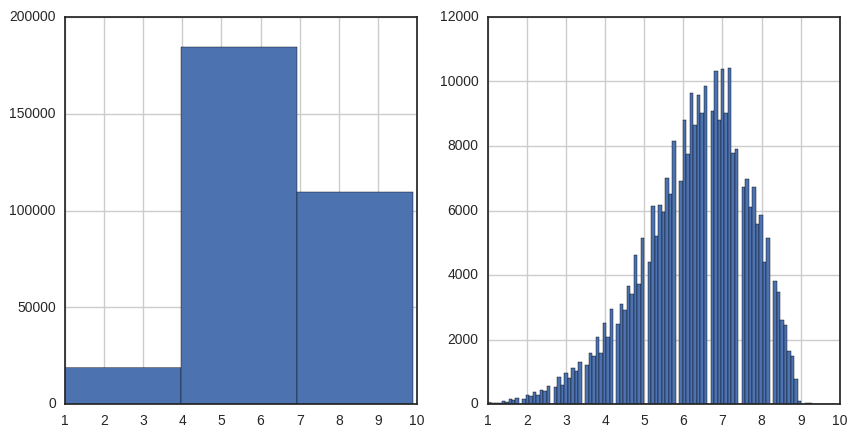

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movie_df['Rating'].hist(bins=3)
plt.subplot(1,2,2)
movie_df['Rating'].hist(bins=100)

What does the argument in `plt.subplot(1,2,1)` mean?  
http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

Ok, so create 8 subplots (2 rows and 4 columns) with the given `binsizes`. 

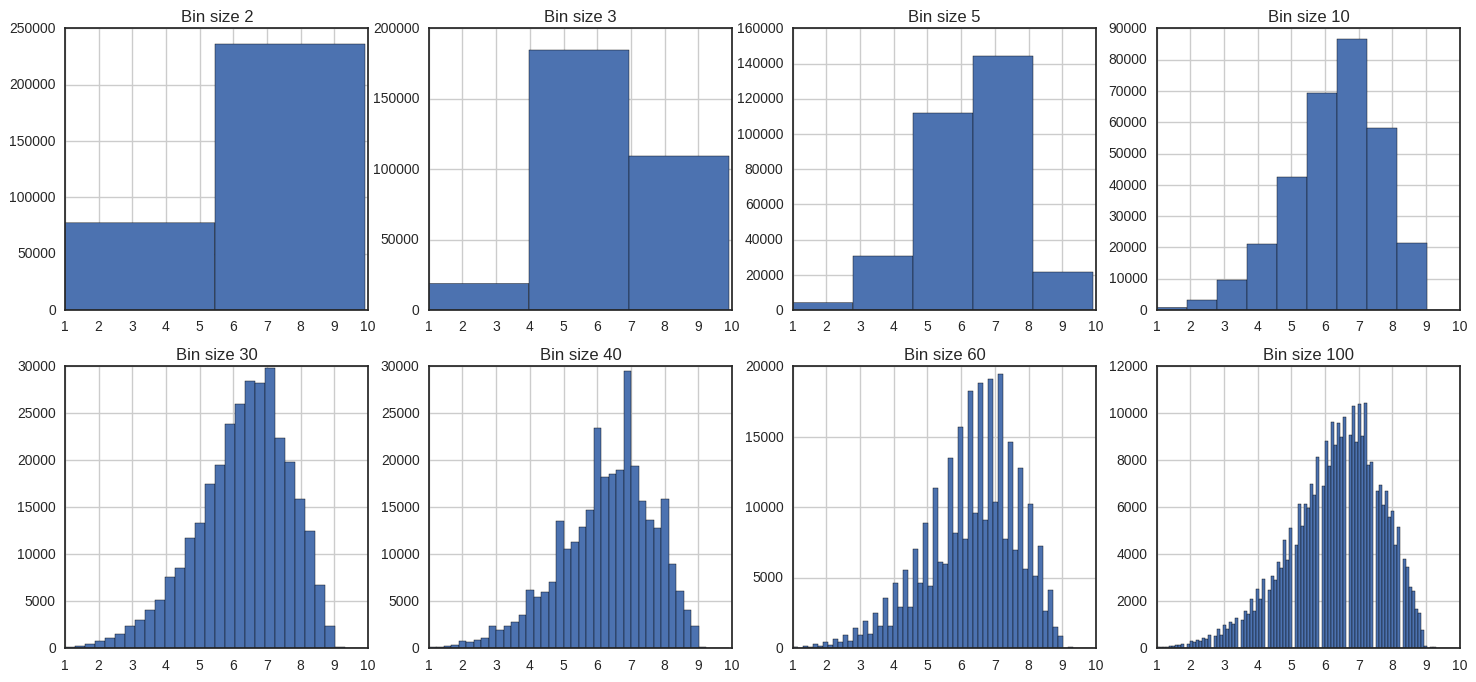

In [15]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

plt.figure(1, figsize=(18,8))

for i, bins in enumerate(binsizes):     
    # TODO: use subplot and hist() function to draw 8 plots
    plt.subplot(2, 4, i + 1)
    movie_df['Rating'].hist(bins = bins)
    plt.title("Bin size " + str(bins))

Do you notice weird patterns that emerge from `bins=40`? Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?

Now, let's try to apply several algorithms for finding the number of bins. 

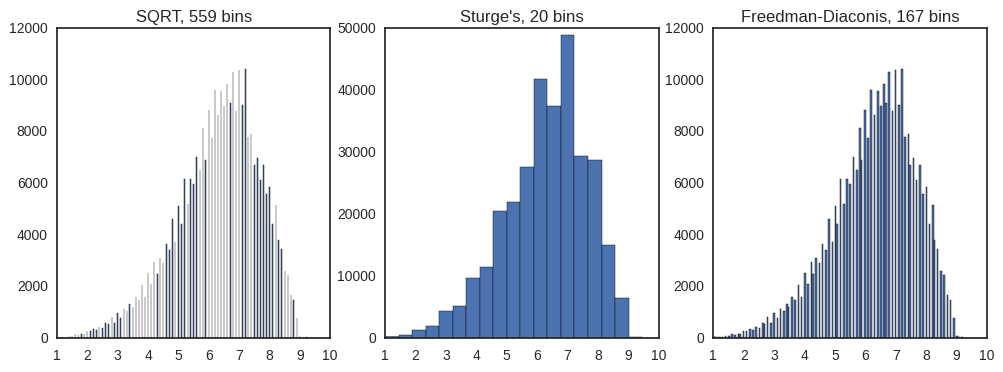

In [16]:
N = len(movie_df['Rating'])

# TODO: plot three histograms based on three formulae

plt.figure(figsize=(12,4))


# Sqrt 
nbins = int(np.sqrt(N))

plt.subplot(1,3,1)
plt.hist(movie_df['Rating'], bins = nbins)
plt.title("SQRT, {0} bins".format(nbins))

# Sturge's formula
plt.subplot(1,3,2)
nbins = int(np.ceil(np.log2(N) + 1))
plt.hist(movie_df['Rating'], bins = nbins)
plt.title("Sturge's, {0} bins".format(nbins))

# Freedman-Diaconis
plt.subplot(1,3,3)
data = movie_df['Rating'].order()
iqr = np.percentile(data, 75) - np.percentile(data, 25)
width = 2*iqr/np.power(N, 1/3)
nbins = int((max(data) - min(data)) / width)
plt.hist(movie_df['Rating'], bins = nbins)
plt.title("Freedman-Diaconis, {0} bins".format(nbins))


# Investigating the anomalies in the histogram

Let's investigate the anormalies in the histogram. 

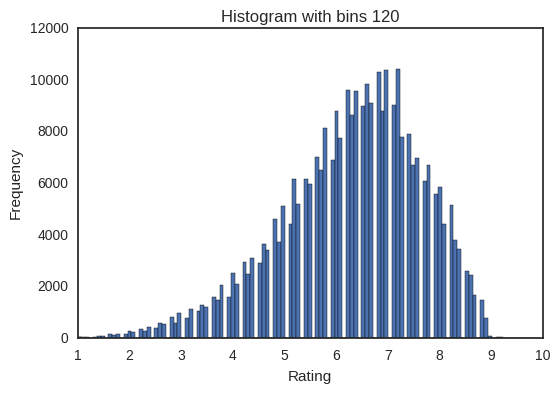

In [17]:
# TODO: draw the histogram with 120 bins
n, bins, patches = plt.hist(movie_df['Rating'], bins = 120)
plt.title("Histogram with bins 120")
plt.xlabel("Rating")
plt.ylabel("Frequency")

We can locate where the empty bins are, by checking whether the value in the n is zero or not. 

In [18]:
# TODO: print out bins that doesn't contain any values. Check whether they fall into range like [1.8XX, 1.8XX]
# useful zip: zip(bins[:-1], bins[1:], n)  what does this do?
zip_values = zip(bins[:-1], bins[1:], n)
print("Range with value zero's are as follows")
for i in zip_values:
    if i[2] == 0:
        print([i[0], i[1]])
        if str(i[0])[:3] == str(i[1])[:3]:
            print("They fall in range")

Range with value zero's are as follows
[1.2225000000000001, 1.2966666666666666]
They fall in range
[1.5191666666666666, 1.5933333333333333]
They fall in range
[1.8158333333333334, 1.8900000000000001]
They fall in range
[2.1124999999999998, 2.1866666666666665]
They fall in range
[2.4091666666666667, 2.4833333333333334]
They fall in range
[2.7058333333333335, 2.7800000000000002]
They fall in range
[3.0024999999999999, 3.0766666666666667]
They fall in range
[3.2250000000000001, 3.2991666666666668]
They fall in range
[3.5216666666666669, 3.5958333333333337]
They fall in range
[3.8183333333333334, 3.8925000000000001]
They fall in range
[4.1150000000000002, 4.1891666666666669]
They fall in range
[4.4116666666666671, 4.4858333333333338]
They fall in range
[4.7083333333333339, 4.7825000000000006]
They fall in range
[5.0049999999999999, 5.0791666666666666]
They fall in range
[5.3016666666666667, 5.3758333333333335]
They fall in range
[5.5241666666666669, 5.5983333333333336]
They fall in range
[

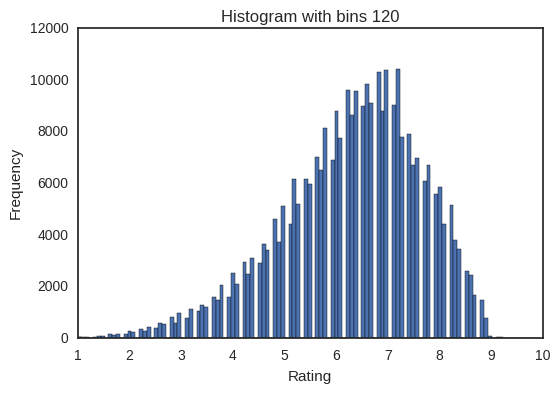

In [19]:
# TODO: draw the histogram with 120 bins
n, bins, patches = plt.hist(movie_df['Rating'], bins = 120)
plt.title("Histogram with bins 120")
plt.xlabel("Rating")
plt.ylabel("Frequency")

One way to identify the peak is comparing the number to the next bin and see whether it is much higher than the next bin. 

In [20]:
# TODO: identify peaks and print the bins with the peaks 
# e.g. 
# [1.0, 1.1]
# [1.3, 1.4]
# [1.6, 1.7]
# ...
#
# you can use zip again like zip(bins[:-1], bins[1:]  ... ) to access the data in two adjacent bins.
values = list(zip(bins[:-1], bins[1:], n))
print("Bin with peaks are as follows")
for i in range(1, len(values)):
    try:
        if ((values[i][2] > values[i-1][2]) and (values[i][2] > values[i+1][2])):
            print([values[i][0], values[i][1]])
    except IndexError:
        pass

Bin with peaks are as follows
[1.1483333333333334, 1.2225000000000001]
[1.3708333333333333, 1.4450000000000001]
[1.5933333333333333, 1.6675]
[1.7416666666666667, 1.8158333333333334]
[1.9641666666666668, 2.0383333333333331]
[2.1866666666666665, 2.2608333333333333]
[2.335, 2.4091666666666667]
[2.5575000000000001, 2.6316666666666668]
[2.7800000000000002, 2.854166666666667]
[2.9283333333333337, 3.0024999999999999]
[3.1508333333333334, 3.2250000000000001]
[3.3733333333333335, 3.4475000000000002]
[3.5958333333333337, 3.6700000000000004]
[3.7441666666666671, 3.8183333333333334]
[3.9666666666666668, 4.0408333333333335]
[4.1891666666666669, 4.2633333333333336]
[4.3375000000000004, 4.4116666666666671]
[4.5600000000000005, 4.6341666666666672]
[4.7825000000000006, 4.8566666666666674]
[4.9308333333333341, 5.0049999999999999]
[5.1533333333333333, 5.2275]
[5.3758333333333335, 5.4500000000000002]
[5.5983333333333336, 5.6725000000000003]
[5.746666666666667, 5.8208333333333337]
[5.9691666666666672, 6.04

Ok. They doesn't necessarilly cover the integer values. Let's see the minimum number of votes. 

In [21]:
movie_df.describe()

,Year,Rating,Votes
count,313011.000000,313011.000000,313011.000000
mean,1988.418334,6.296195,1691.231775
std,26.636414,1.363866,18593.708570
min,1874.000000,1.000000,5.000000
25%,1974.000000,5.500000,10.000000
50%,1999.000000,6.500000,25.000000
75%,2009.000000,7.300000,110.500000
max,2017.000000,9.900000,1511933.000000


Ok, the minimum number of votes is 5 not 1. IMDB may only keep the rating information for movies with at least 5 votes. This may explain why the most frequent ratings are like 6.4 and 6.6. Let's plot the histogram with only the rows with 5 votes. Set the binsize 30. 

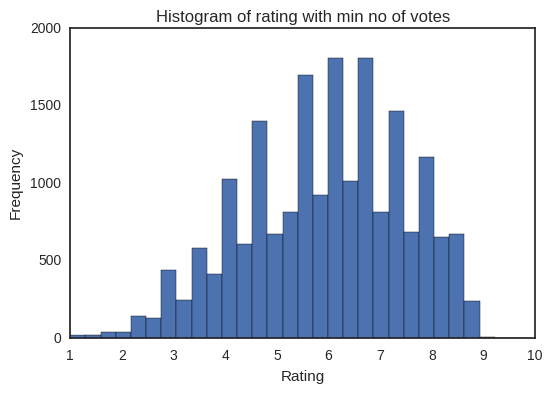

In [22]:
# TODO: plot the histogram only with ratings that have the minimum number of votes. 
df = movie_df[movie_df['Votes'] == 5]
plt.hist(df['Rating'], bins = 30)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of rating with min no of votes")

Then, print out what are the most frequent rating values. Use `value_counts()` function for dataframe. 

In [23]:
# TODO: filter out the rows with the min number of votes (5) and then `value_counts()` them. 
# sort the result to see what are the most common numbers. 
df['Rating'].value_counts()
# As you can see in the following output that 6.4 is most common rating.

6.4    1017
6.6     932
6.2     923
5.8     922
6.0     883
6.8     877
5.6     861
5.4     835
7.0     818
5.2     815
4.8     760
7.2     735
7.4     734
7.6     689
5.0     673
8.2     655
4.6     640
7.8     621
4.4     611
4.2     565
8.0     550
4.0     465
3.8     412
8.4     366
8.6     307
3.6     295
3.4     289
3.2     250
8.8     243
2.8     226
3.0     216
2.6     133
2.4      81
2.2      60
2.0      40
1.8      28
1.4      23
1.6      16
1.0      15
1.2       6
9.2       5
9.0       5
9.4       5
9.8       2
9.6       2
dtype: int64

So, the most frequent values are not "x.0". Let's see the CDF. 

In [24]:
# Plot the CDF of votes. 


What's going on? The number of votes is heavily skewed and most datapoints are at the left end. 

In [25]:
# TODO: plot the same thing but limit the xrange (xlim) to [0, 100]. 



Draw a histogram focused on the range [0, 10] to just see how many datapoints are there. 

In [26]:
# TODO: set the xlim to [0, 10] adjust ylim and bins so that 
# we can see how many datapoints are there for each # of votes. 


Let's assume that most 5 ratings are from 5 to 8 and see what we'll get. You can use `itertools.product` function to generate the fake ratings. 

In [27]:
#list(product([5,6,7,8], repeat=5))[:10]

In [28]:
from itertools import product
from collections import Counter

c = Counter()
for x in product([5,6,7,8], repeat=5):
    c[str(round(np.mean(x), 1))]+=1
sorted(c.items(), key=lambda x: x[1], reverse=True)
    
# or sorted(Counter(str(round(np.mean(x), 1)) for x in product([5,6,7,8], repeat=5)).items(), key=lambda x: x[1], reverse=True)

[('6.6', 155),
 ('6.4', 155),
 ('6.8', 135),
 ('6.2', 135),
 ('7.0', 101),
 ('6.0', 101),
 ('7.2', 65),
 ('5.8', 65),
 ('7.4', 35),
 ('5.6', 35),
 ('5.4', 15),
 ('7.6', 15),
 ('7.8', 5),
 ('5.2', 5),
 ('5.0', 1),
 ('8.0', 1)]

# Boxplot

Let's look at the example data that we looked at during the class. 

In [29]:
data = [-1, 3, 3, 4, 15, 16, 16, 17, 23, 24, 24, 25, 35, 36, 37, 46]

The [**`numpy.percentile()`**](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html) function provides a way to calculate the percentiles. Note that using the option `interpolation`, you can specify which value to take when the percentile value lies in between numbers. The default is linear. 

In [30]:
print(np.percentile(data, 25))
print(np.percentile(data, 50), np.median(data))
print(np.percentile(data, 75))

12.25
20.0 20.0
27.5


Can you explain why do you get those first and third quartile values? The first quantile value is not 4, not 15, and not 9.5. Why?

Let's draw a boxplot with matplotlib. 

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3e9163128>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3e9169ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3e916dd30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3e916d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3e9163ac8>,
  <matplotlib.lines.Line2D at 0x7fd3e9163d30>]}

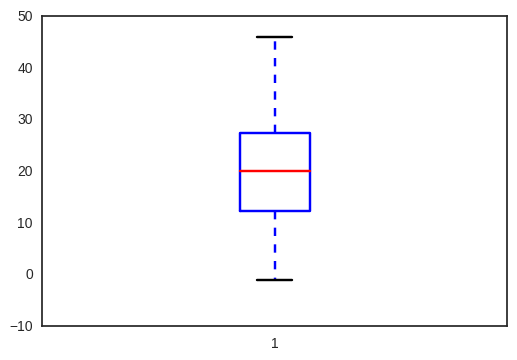

In [31]:
# TODO: draw a boxplot of the data
plt.boxplot(data)